#**PROJECT OVERVIEW**
---
This project's main objective is to create two models, one for predicting a student's GPA and another for classifying the student's ability to pass or not pass. Another objective for this project is to segment student performances into several clusters.

https://drive.google.com/file/d/1OEsn8u3RKF1cnFfW3YwquYX7AUjVLcS8/view?usp=sharing

note: in order to make it easier to extract, it is decided that the data would be placed inside github

#**Importing Libraries**
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFECV, chi2, f_regression
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, mean_absolute_error, r2_score, root_mean_squared_error, roc_curve, auc, precision_recall_curve
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#**Data Loading**
---
The columns of this dataset includes:
1. **StudentID**: A unique identifier assigned to each student.
2. **Age**: The age of the students ranges from 15 to 18 years.
3. **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.
4. **Ethnicity**: The ethnicity of the students (0: Caucasian, 1: African American, 2: Asian, 3: Other)
5. **ParentalEducation**: The education level of the parents (0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher)
6. **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
7. **Absences**: Number of absences during the school year, ranging from 0 to 30.
8. **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.
9. **ParentalSupport**: The level of parental support(0: None, 1: Low, 2: Moderate, 3: High, 4: Very High)
10. **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
11. **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.
12. **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.
13. **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
14. **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
15. **GradeClass**: Classification of students' grades based on GPA:
     * 0: 'A' (GPA >= 3.5)
     * 1: 'B' (3.0 <= GPA < 3.5)
     * 2: 'C' (2.5 <= GPA < 3.0)
     * 3: 'D' (2.0 <= GPA < 2.5)
     * 4: 'F' (GPA < 2.0)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/Student_Performance_DA.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


#**Exploratory Data Analysis - EDA**
---
At this step, we attempt to understand the characteristics of the dataset that would be used for data preparation as well as creating models in later steps

##**1. Data Description**
---

###a. Data Type Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


###b. Descriptive Statistics

In [ ]:
df.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


##**2. Duplicate Values Detection**
---

In [ ]:
df.duplicated().sum()

np.int64(0)

##**3. Data Distribution**
---

###a. Numerical Distribution

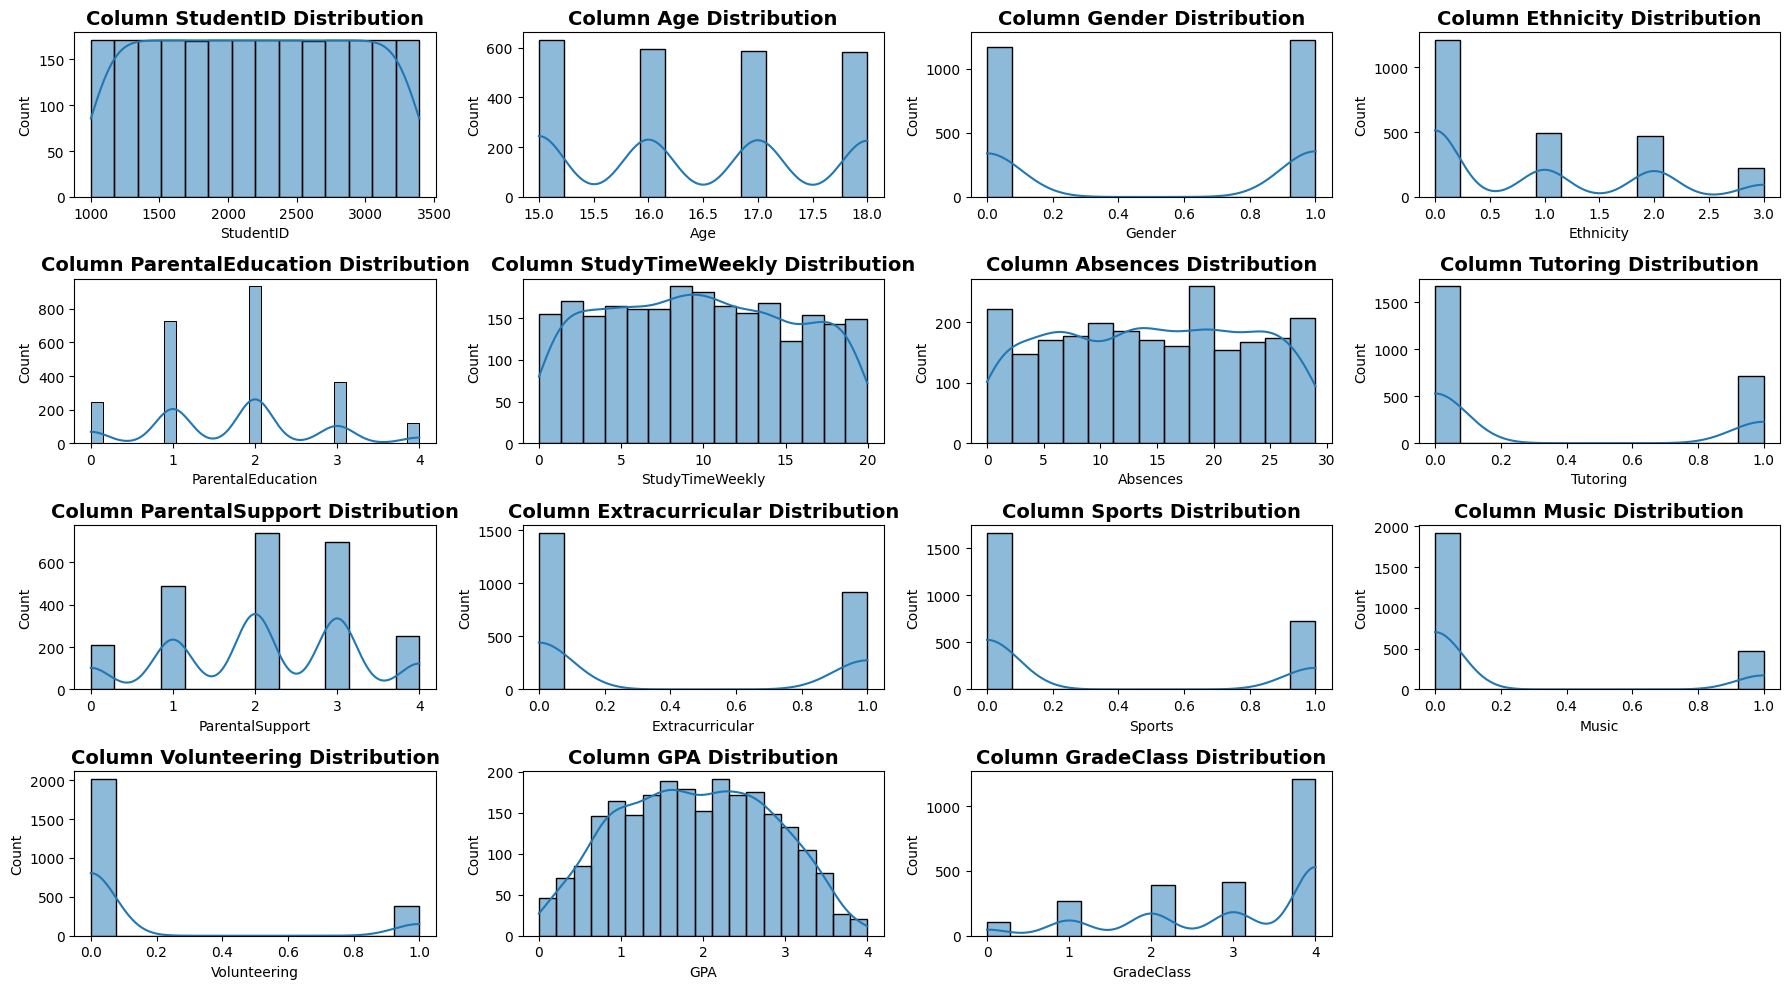

In [ ]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(df.columns):
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Column {col} Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

###b. Distribution on Discrete Columns

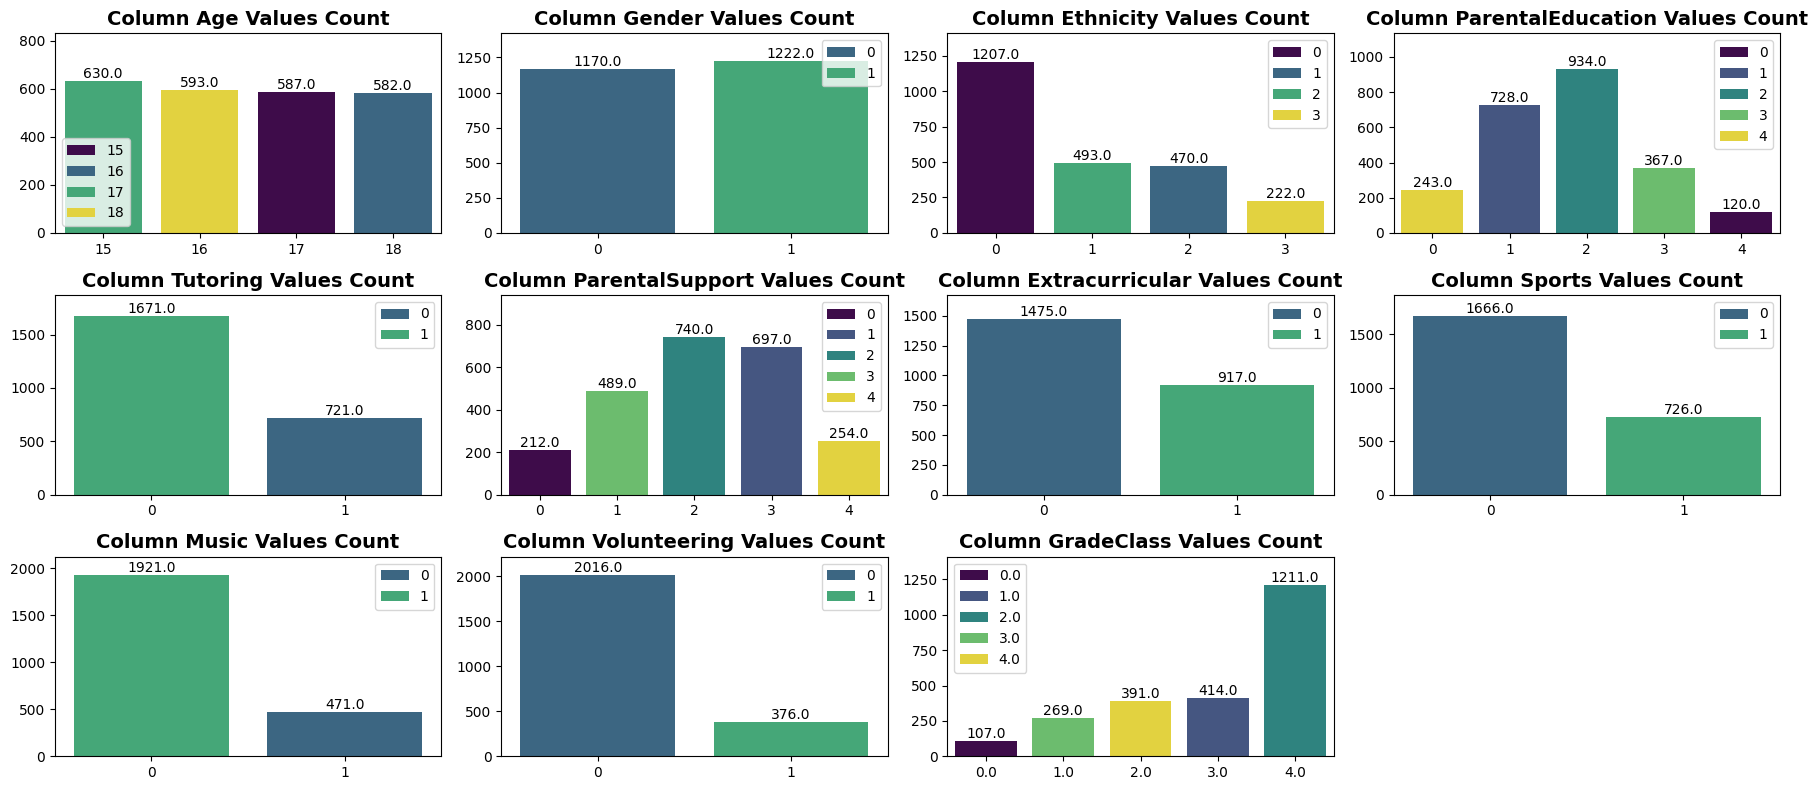

In [ ]:
cols_forbid = ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
col = [col for col in df.columns if col not in cols_forbid]

plt.figure(figsize=(18, 8))
for i, column in enumerate(col):
  plt.subplot(3, 4, i+1)
  counts = df[column].value_counts()
  ax = sns.barplot(x=counts.index.tolist(), y=counts.values.tolist(), hue=df[column].unique(), palette='viridis')
  for val in ax.containers:
    label=[v.get_height() for v in val]
    ax.bar_label(val, labels=label, label_type='edge')
  plt.title(f'Column {column} Values Count', fontsize=14, fontweight='bold')
  plt.ylim(ymax=counts.max() + 200)
plt.tight_layout()
plt.show()

##**4. Outliers Detection**
---

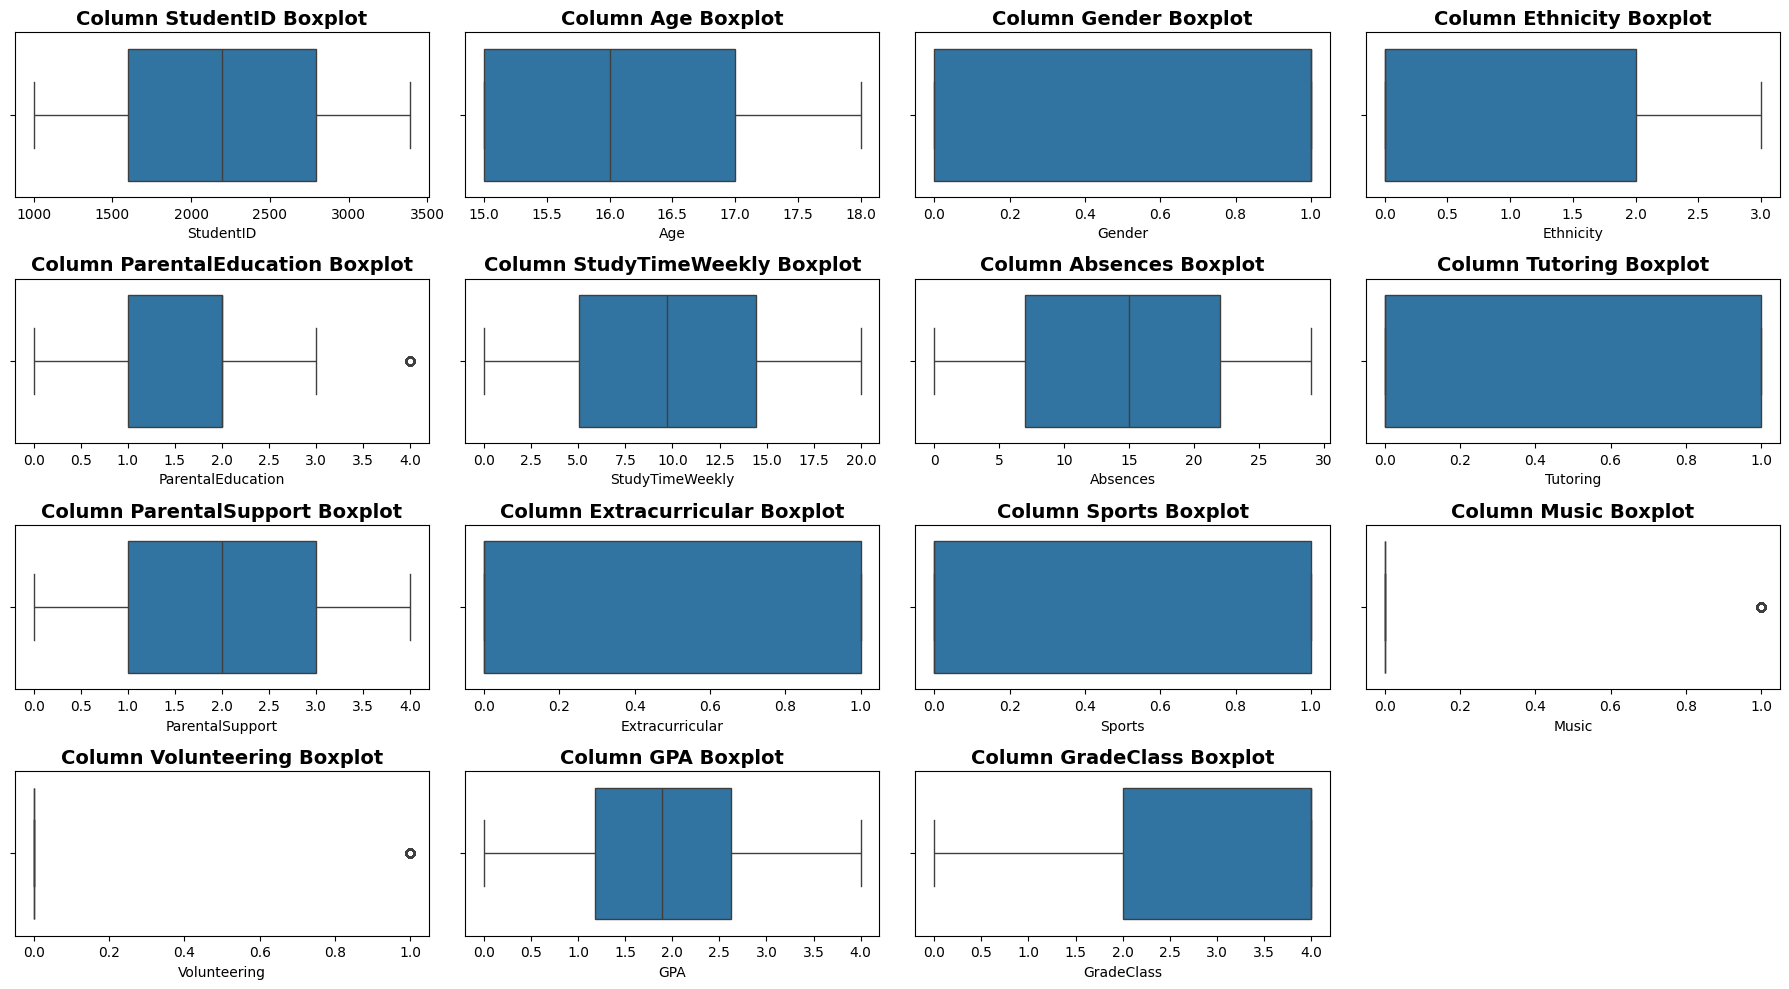

In [ ]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(df.columns):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Column {col} Boxplot', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##**5. Data Correlation**
---

Text(0.5, 1.0, 'Data Correlation')

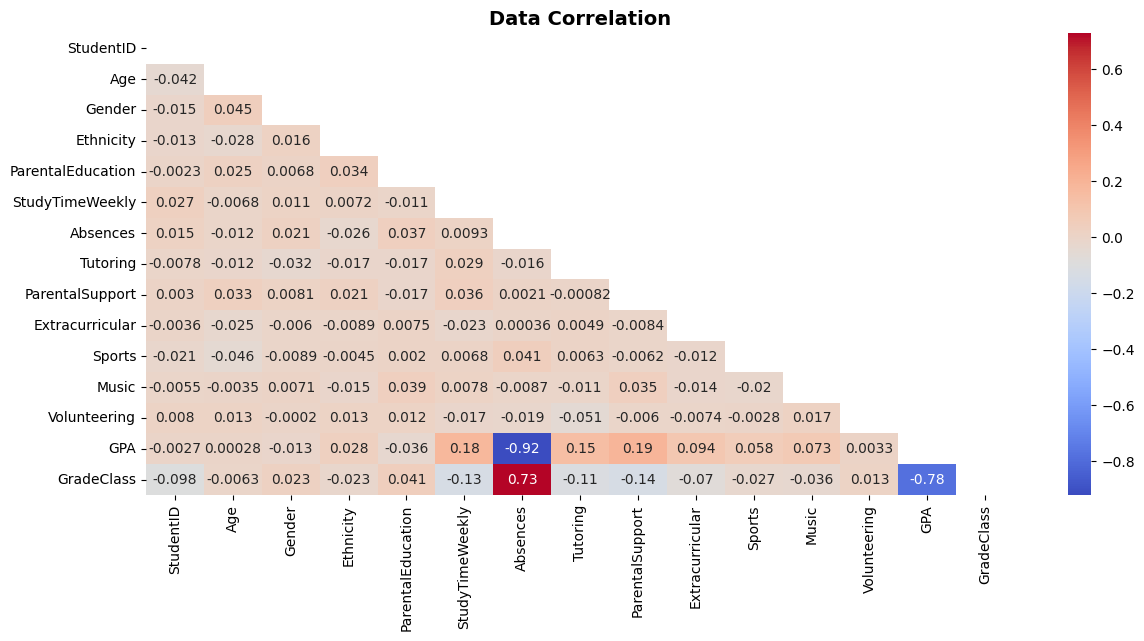

In [ ]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=float))

plt.figure(figsize=(14, 6))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')
plt.title('Data Correlation', fontweight='bold', fontsize=14)

#**Data Pre-Processing**
---

##**1. Creating New Features**
---

In [ ]:
df['Pass'] = [1 if val >=2.5 else 0 for val in df['GPA']]
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Pass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


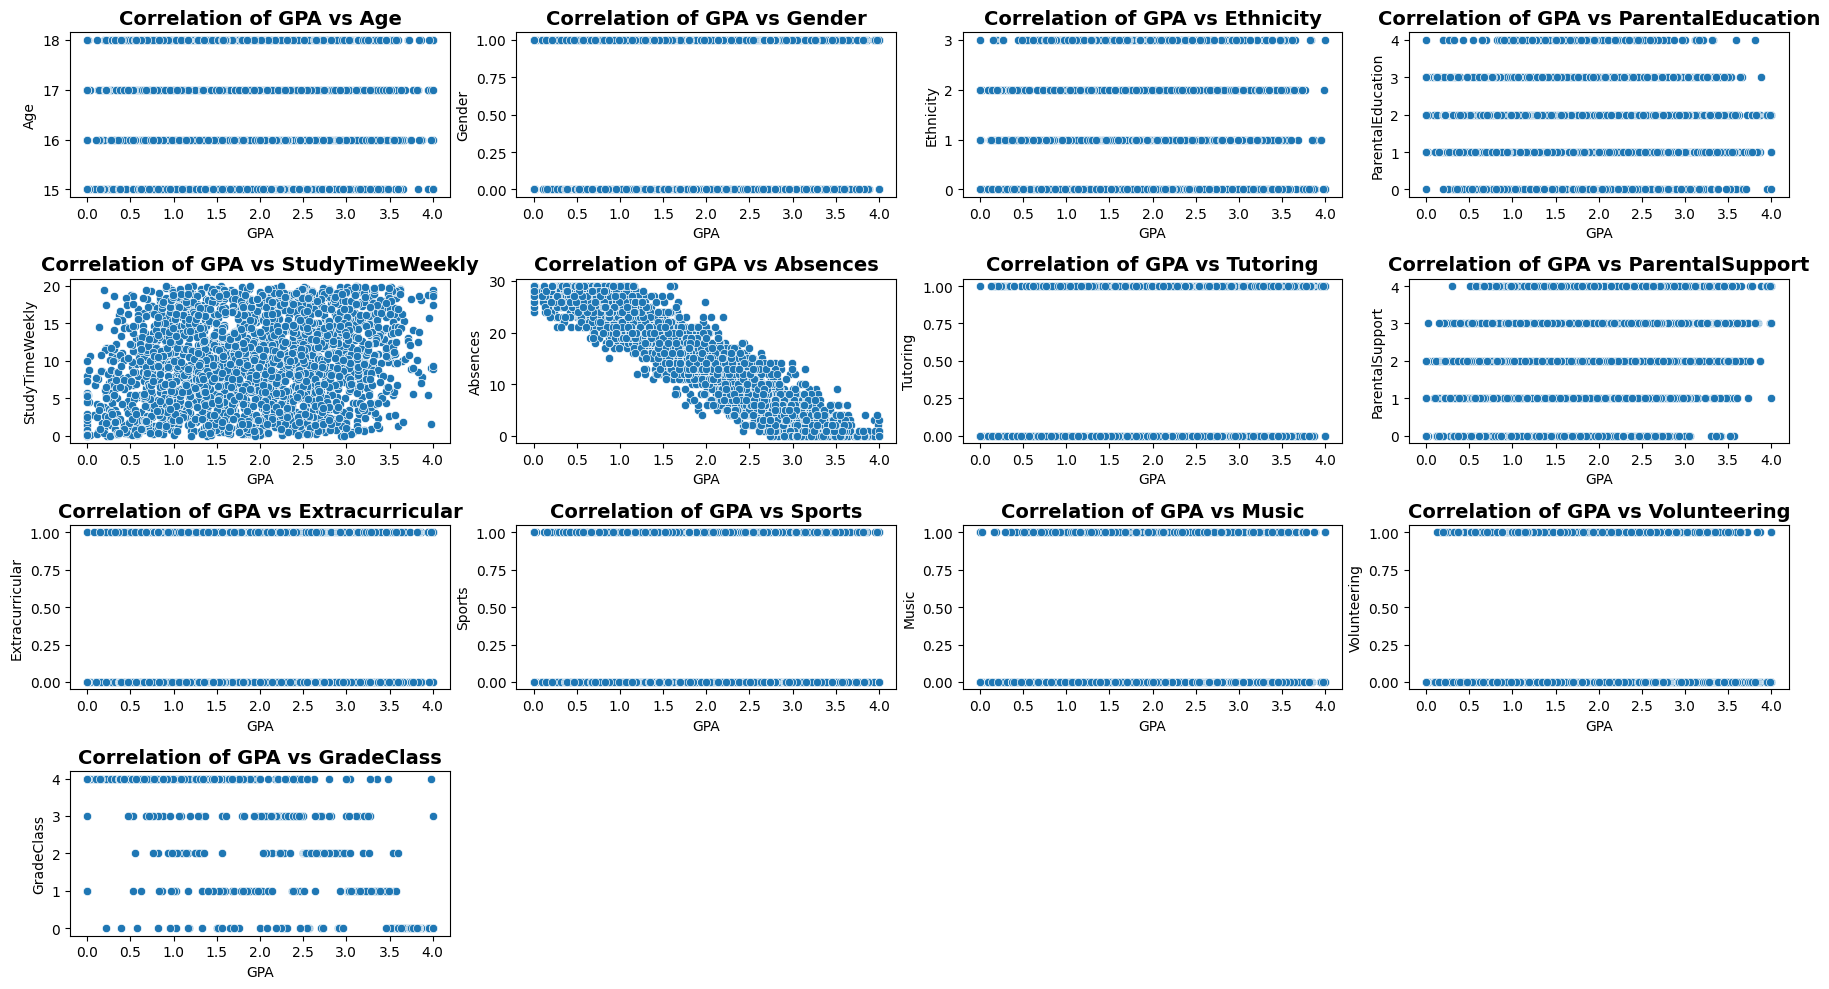

In [ ]:
cols = [col for col in df.columns if col not in ['StudentID', 'Pass', 'GPA']]

plt.figure(figsize=(18, 10))
for i, col in enumerate(cols):
  plt.subplot(4, 4, i+1)
  sns.scatterplot(x=df['GPA'], y=df[col])
  plt.title(f'Correlation of GPA vs {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##**2. Feature Selection**
---

In [ ]:
input = df[[col for col in df.columns if col not in ['GPA', 'GradeClass', 'StudentID', 'Pass']]]
out_reg = df['GPA']
out_clf = df['Pass']

###a. Select K-Best

In [ ]:
# For Regression

selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(input, out_reg)
score_df_reg = pd.DataFrame({
    'score': selector.scores_
}, index=input.columns.tolist()).sort_values(by='score', ascending=False)

score_df_reg

,score
Absences,13043.040639
ParentalSupport,90.268415
StudyTimeWeekly,79.364310
Tutoring,51.414981
Extracurricular,21.342139
Music,12.916947
Sports,8.027815
ParentalEducation,3.076260
Ethnicity,1.843141
Gender,0.426665


In [ ]:
# For Classification

selector = SelectKBest(score_func=chi2, k=5)
selector.fit(input, out_clf)
score_df_clf = pd.DataFrame({
    'score': selector.scores_
}, index=input.columns.tolist()).sort_values(by='score', ascending=False)

score_df_clf

,score
Absences,6415.017640
StudyTimeWeekly,116.958297
ParentalSupport,18.511966
Tutoring,14.850606
Extracurricular,8.533222
Music,3.678069
ParentalEducation,1.478495
Sports,0.503535
Gender,0.175206
Ethnicity,0.164644


In [ ]:
cols_skbest_reg = score_df_reg.head(3).index.tolist()
cols_skbest_clf = score_df_clf.head(2).index.tolist()

###b. RFECV - Recursive Feature Elimination with Cross-Validation

In [ ]:
# For Regression

linreg = LinearRegression()
selector = RFECV(
    estimator=linreg,
    step=1,
    cv=5,
    scoring='r2', #neg_mean_squared_error
    n_jobs=-1,
    verbose=5
)
selector.fit(input, out_reg)

result_df_reg = pd.DataFrame({
    'use': selector.support_
}, index=input.columns.tolist())
result_df_reg

Fitting estimator with 12 features.
Fitting estimator with 11 features.


,use
Age,True
Gender,True
Ethnicity,False
ParentalEducation,False
StudyTimeWeekly,True
Absences,True
Tutoring,True
ParentalSupport,True
Extracurricular,True
Sports,True


In [ ]:
# For Classification

logreg = LogisticRegression()
selector = RFECV(
    estimator=logreg,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=5
)
selector.fit(input, out_clf)

result_df_clf = pd.DataFrame({
    'use': selector.support_
}, index=input.columns.tolist())
result_df_clf

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,use
Age,False
Gender,True
Ethnicity,False
ParentalEducation,False
StudyTimeWeekly,True
Absences,True
Tutoring,True
ParentalSupport,True
Extracurricular,True
Sports,True


In [ ]:
cols_rfecv_reg = result_df_reg[result_df_reg['use'] == True].index.tolist()
cols_rfecv_clf = result_df_clf[result_df_clf['use'] == True].index.tolist()

##**3. Data Splitting**
---

###a. For Regression

In [ ]:
x_reg = df[cols_rfecv_reg]
y_reg = df['GPA']

# Creating Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_reg = poly.fit_transform(x_reg)

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state = 42)

###b. For Classification

In [ ]:
x_clf = df[cols_rfecv_clf]
y_clf = df['Pass']

# Undersampling
sampler = RandomUnderSampler(random_state=42)
x_clf, y_clf = sampler.fit_resample(x_clf, y_clf)

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state = 42)

##**4. Data Scaling**
---

###a. For Regression

In [ ]:
scaler_reg = StandardScaler()
scaler_reg.fit(x_train_reg)

x_train_reg_scaled = scaler_reg.transform(x_train_reg)
x_test_reg_scaled = scaler_reg.transform(x_test_reg)

###b. For Classification

In [ ]:
scaler_clf = StandardScaler()
scaler_clf.fit(x_train_clf)

x_train_clf_scaled = scaler_clf.transform(x_train_clf)
x_test_clf_scaled = scaler_clf.transform(x_test_clf)

#**Data Modelling**
---

##**1. Classification**
---

###a. Logistic Regression

Cross Validation Scores: [0.92144374 0.94055202 0.9212766 ]
Mean of Cross Validation Scores: 0.92775744982006

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       130
           1       0.93      0.96      0.95       153

    accuracy                           0.94       283
   macro avg       0.94      0.94      0.94       283
weighted avg       0.94      0.94      0.94       283



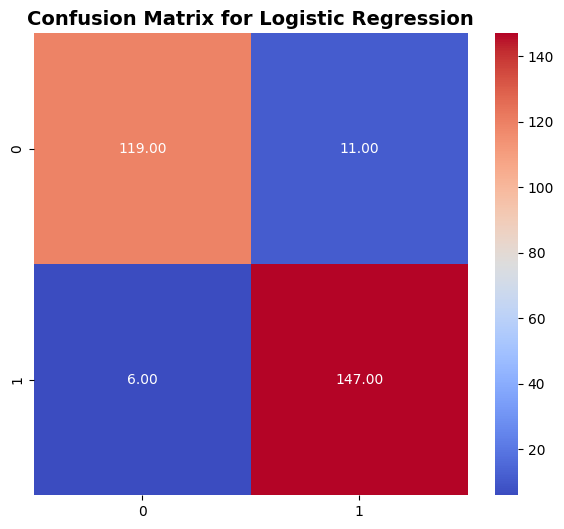

In [ ]:
model = LogisticRegression()
model.fit(x_train_clf_scaled, y_train_clf)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val = cross_val_score(model, x_clf, y_clf, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = model.predict(x_test_clf_scaled)
print(f'Classification Report:\n{classification_report(y_test_clf, y_pred)}')

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Confusion Matrix for Logistic Regression', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val = cross_val_score(model, x_clf, y_clf, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

Cross Validation Scores: [0.92144374 0.94055202 0.9212766 ]
Mean of Cross Validation Scores: 0.92775744982006



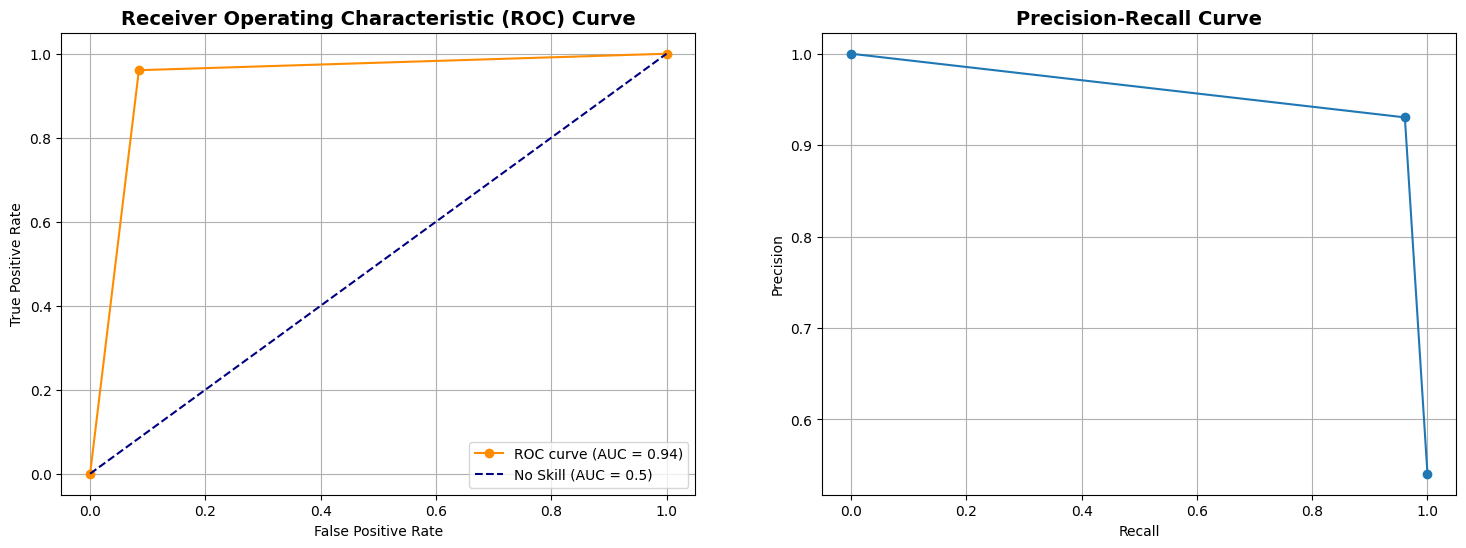

In [ ]:
fpr, tpr, threshold = roc_curve(y_test_clf, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test_clf, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

###b. Support Vector Machine

Cross Validation Scores: [0.91082803 0.91507431 0.90212766]
Mean of Cross Validation Scores: 0.9093433316769812

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       130
           1       0.91      0.95      0.93       153

    accuracy                           0.92       283
   macro avg       0.92      0.92      0.92       283
weighted avg       0.92      0.92      0.92       283



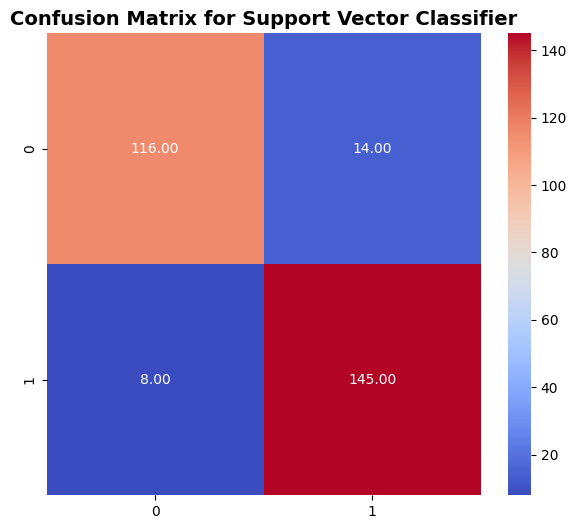

In [ ]:
model = SVC(kernel='rbf')
model.fit(x_train_clf_scaled, y_train_clf)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val = cross_val_score(model, x_clf, y_clf, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = model.predict(x_test_clf_scaled)
print(f'Classification Report:\n{classification_report(y_test_clf, y_pred)}')

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Confusion Matrix for Support Vector Classifier', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val = cross_val_score(model, x_clf, y_clf, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

Cross Validation Scores: [0.91082803 0.91507431 0.90212766]
Mean of Cross Validation Scores: 0.9093433316769812



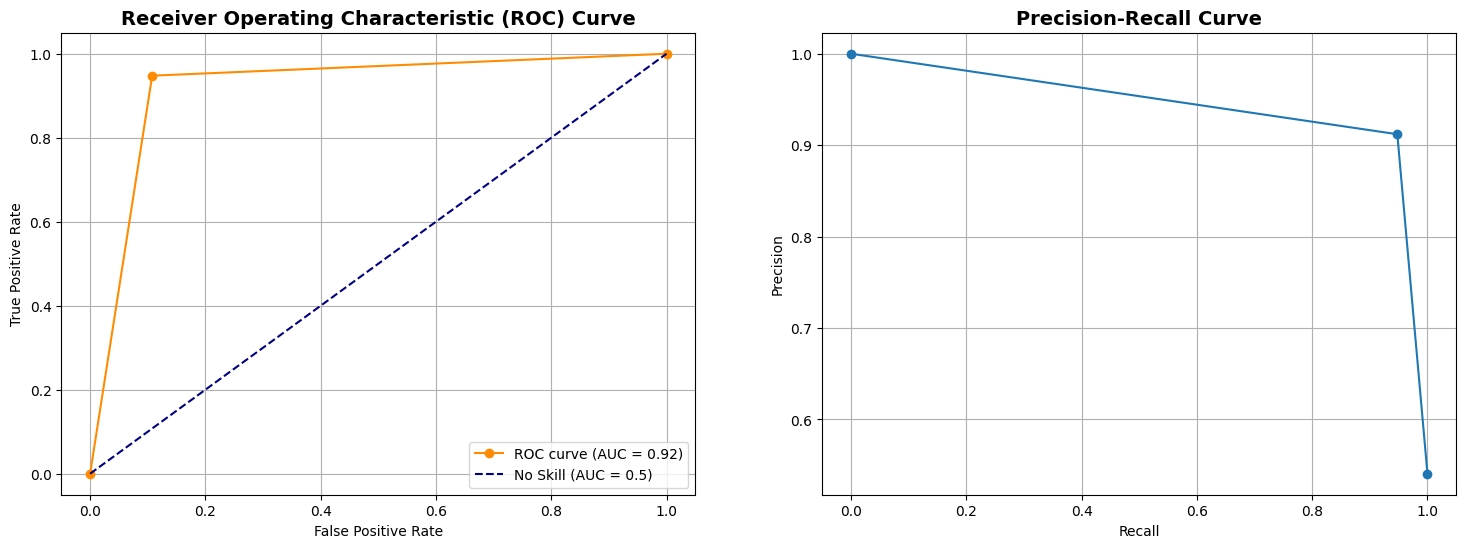

In [ ]:
fpr, tpr, threshold = roc_curve(y_test_clf, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test_clf, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

##**2. Regression**
---

###a. Linear Regression - Using Polynomial Features

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train_reg_scaled, y_train_reg)

y_pred = linreg.predict(x_test_reg_scaled)
rmse = root_mean_squared_error(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f'R2 Score: {round(r2, 3)}')
print(f'Mean Absolute Error: {round(mae, 3)}')
print(f'Root Mean Squared Error: {round(rmse, 3)}')

R2 Score: 0.953
Mean Absolute Error: 0.155
Root Mean Squared Error: 0.197


###b. Plotting Regression Residuals

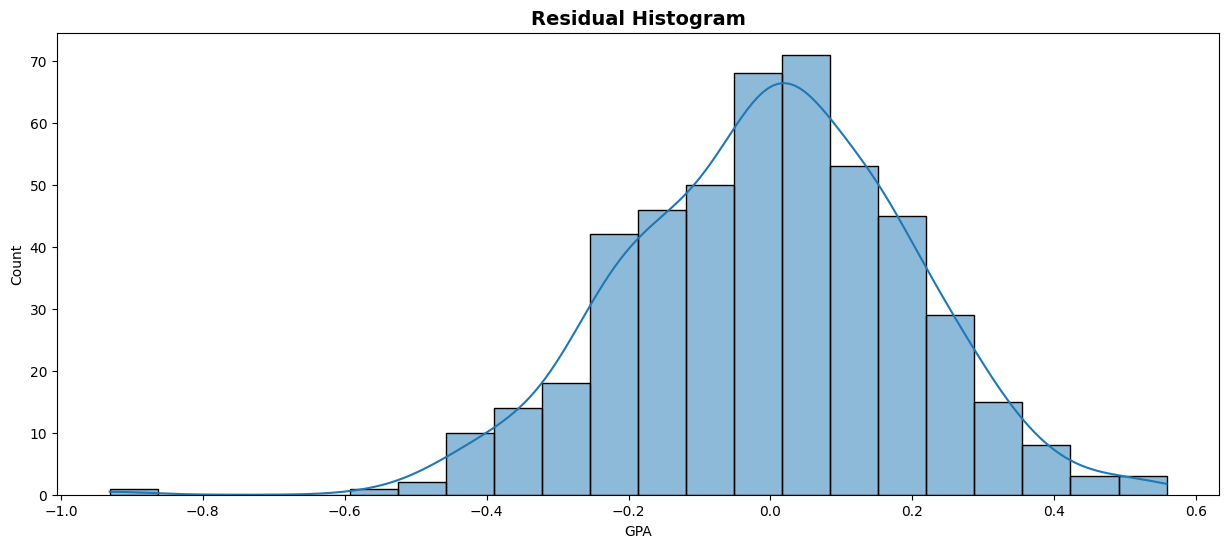

In [ ]:
residual = y_test_reg - y_pred

plt.figure(figsize=(15, 6))
sns.histplot(residual, kde=True)
plt.title('Residual Histogram', fontsize=14, fontweight='bold')
plt.show()

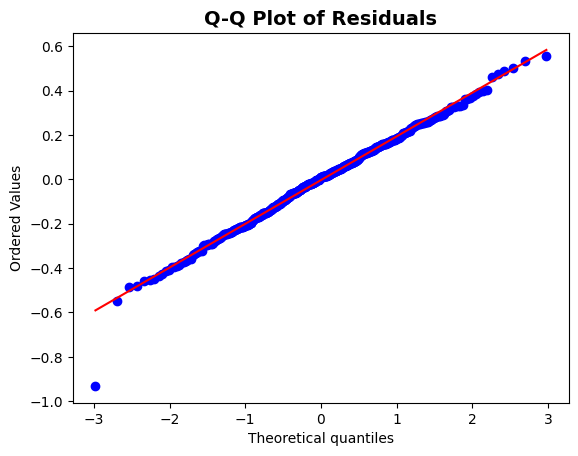

In [ ]:
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=14, fontweight='bold')
plt.show()

###c. Shapiro-Wilk Test

Results of this test shows that the residuals are still normally distributed, and as such, the linear regression model created is valid

In [ ]:
test = stats.shapiro(residual)
print(f"Shapiro-Wilk Test: Statistic={test.statistic:.3f}\nP-value={test.pvalue:.3f}")

Shapiro-Wilk Test: Statistic=0.993
P-value=0.032


###d. Breusch-Pagan Test

Since the P values are more than 0.05, it could be concluded that the model has no heteroscedasticity, meaning that the residuals are more or less constant with regards to its distribution

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

x_sm = sm.add_constant(x_test_reg_scaled)
bp_test = het_breuschpagan(residual, x_sm)
stat, p_val, f_stat, f_p_value = bp_test

print(f'LM Statistic: {stat}\nLM P-Value: {p_val}\nF Statistic: {f_stat}\nF P-Value: {f_p_value}')

LM Statistic: 68.61750173107636
LM P-Value: 0.35575774296455165
F Statistic: 1.1874301784227301
F P-Value: 0.17347371187600188


###e. Auto-Correlation Test

Since the result of the Durbin-Watson test is no less than 1.5 and no higher than 2.5, it could be concluded that the residuals of this model are independent to each other

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residual)
print(f'Durbin-Watson Statistic: {dw_stat}')

Durbin-Watson Statistic: 2.023691717755152


##**3.Clustering**
---

###a. Feature Selection

In [ ]:
df_cl = df[[col for col in df.columns if col not in ['StudentID', 'Pass']]]
results = []
i = 0

range_cluster = range(2, 10)

for cluster in range_cluster:
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(df_cl)
  label = kmeans.labels_

  selector = SelectKBest(score_func=chi2, k=4)
  selector.fit(df_cl, label)
  result = pd.DataFrame({
      'score': selector.scores_
  }, index=df_cl.columns.tolist()).sort_values(by='score', ascending=False)
  print(f'Results for iteration {i} with {cluster} clusters')
  display(result)
  print(' ')

  results.append(result)
  i+=1

Results for iteration 0 with 2 clusters


,score
Absences,8604.043739
StudyTimeWeekly,3301.886854
GPA,675.448500
GradeClass,473.883598
Music,2.943103
Ethnicity,2.076433
ParentalSupport,1.394888
Gender,1.371081
Volunteering,0.881089
ParentalEducation,0.785733


 
Results for iteration 1 with 3 clusters


,score
Absences,8564.011431
StudyTimeWeekly,3554.498192
GPA,651.671408
GradeClass,567.523942
Volunteering,6.363781
ParentalEducation,2.883116
Sports,1.922108
Music,1.870629
Ethnicity,1.741695
Gender,1.074247


 
Results for iteration 2 with 4 clusters


,score
Absences,8606.362003
StudyTimeWeekly,3296.644635
GPA,676.432626
GradeClass,479.638438
Music,3.293316
Ethnicity,2.328862
ParentalSupport,1.650647
Gender,1.383309
ParentalEducation,1.283757
Volunteering,1.081192


 
Results for iteration 3 with 5 clusters


,score
Absences,8564.011431
StudyTimeWeekly,3554.498192
GPA,651.671408
GradeClass,567.523942
Volunteering,6.363781
ParentalEducation,2.883116
Sports,1.922108
Music,1.870629
Ethnicity,1.741695
Gender,1.074247


 
Results for iteration 4 with 6 clusters


,score
Absences,8604.043739
StudyTimeWeekly,3301.886854
GPA,675.448500
GradeClass,473.883598
Music,2.943103
Ethnicity,2.076433
ParentalSupport,1.394888
Gender,1.371081
Volunteering,0.881089
ParentalEducation,0.785733


 
Results for iteration 5 with 7 clusters


,score
Absences,8590.658189
StudyTimeWeekly,3511.677409
GPA,651.735611
GradeClass,571.038005
Volunteering,5.550814
ParentalEducation,3.287581
Music,1.694854
Sports,1.537476
Ethnicity,1.446485
Tutoring,1.417205


 
Results for iteration 6 with 8 clusters


,score
Absences,8565.986140
StudyTimeWeekly,3552.105170
GPA,650.733879
GradeClass,566.235947
Volunteering,6.280475
ParentalEducation,2.854587
Music,1.910331
Sports,1.757678
Ethnicity,1.627555
Gender,1.080039


 
Results for iteration 7 with 9 clusters


,score
Absences,8604.043739
StudyTimeWeekly,3301.886854
GPA,675.448500
GradeClass,473.883598
Music,2.943103
Ethnicity,2.076433
ParentalSupport,1.394888
Gender,1.371081
Volunteering,0.881089
ParentalEducation,0.785733


In [ ]:
cols_skbest_cl = results[0].head(4).index.tolist()
cols_skbest_cl

['Absences', 'StudyTimeWeekly', 'GPA', 'GradeClass']

###b. K-Means Clustering

In [ ]:
df_cl = df[cols_skbest_cl]

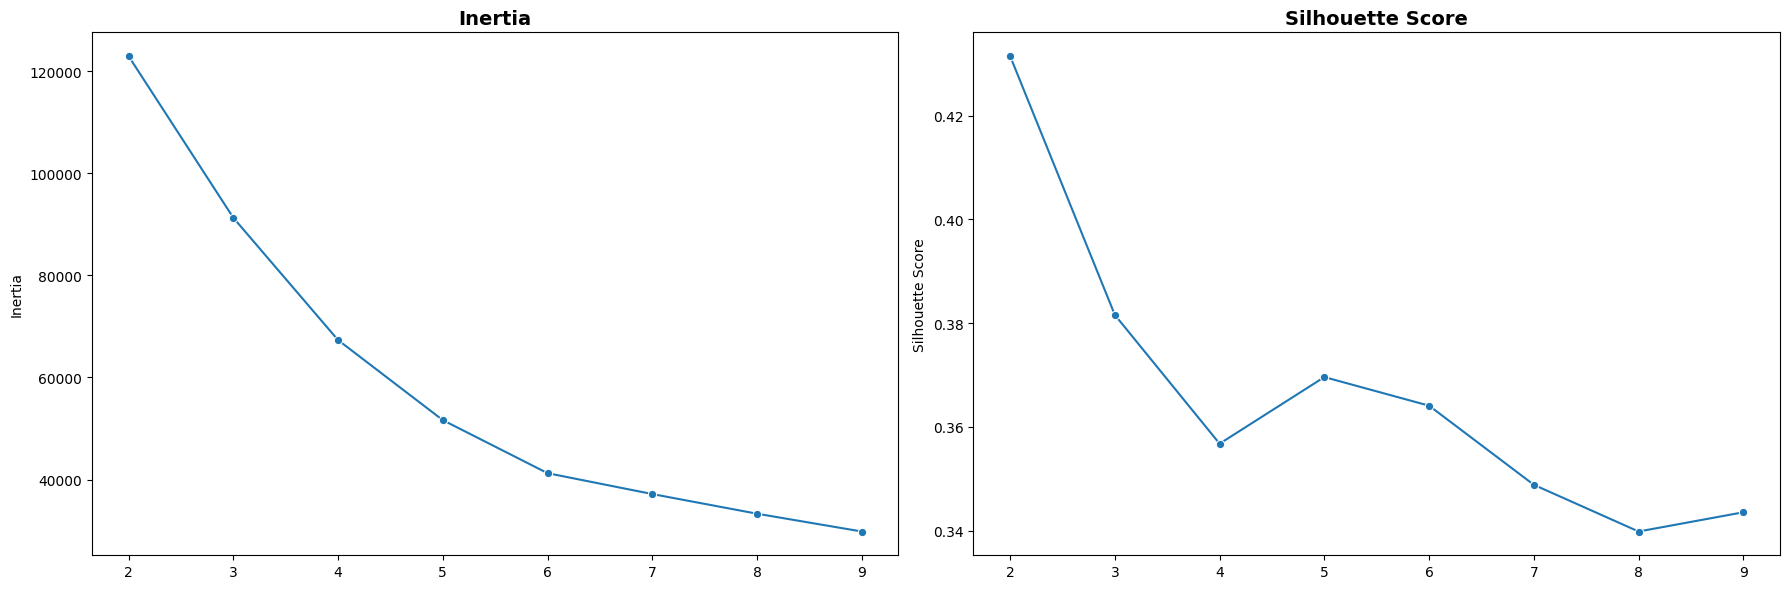

In [ ]:
range_cluster = range(2, 10)
sil_score, inertia = [], []

for cluster in range_cluster:
  kmeans = KMeans(n_clusters=cluster, random_state=42)
  kmeans.fit(df_cl)
  label = kmeans.labels_

  sil_score.append(silhouette_score(df_cl, label, metric='euclidean'))
  inertia.append(kmeans.inertia_)

result_df = pd.DataFrame({
    'Inertia': inertia,
    'Silhouette Score': sil_score
}, index=range_cluster)

plt.figure(figsize=(18, 6))
for i, col in enumerate(result_df.columns):
  plt.subplot(1, 2, i+1)
  sns.lineplot(x=result_df.index.tolist(), y=result_df[col], marker='o')
  plt.title(f'{col}', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_cl)
label = kmeans.labels_

df['cluster'] = kmeans.predict(df[cols_skbest_cl])
df_cl['cluster'] = kmeans.predict(df_cl)

sil_score = silhouette_score(df_cl, label, metric='euclidean')
print(f'Silhouette Score: {round(sil_score, 3)}')

Silhouette Score: 0.387


/tmp/ipython-input-2567129011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['cluster'] = kmeans.predict(df_cl)


###c. Clustering Results

In [ ]:
cluster_result_gen = df.groupby(by='cluster').mean()
cluster_result_gen[['Age', 'Gender', 'StudyTimeWeekly', 'Absences', 'GPA']]

,Age,Gender,StudyTimeWeekly,Absences,GPA
cluster,,,,,
0,16.502080,0.533981,4.754149,19.740638,1.237101
1,16.419602,0.505360,14.713992,21.814701,1.340395
2,16.476424,0.498035,10.155822,6.193517,2.742996


In [ ]:
cluster_result_cnt = df.groupby(by='cluster').agg({
    'StudentID': 'count'
})
cluster_result_cnt

,StudentID
cluster,
0,721
1,653
2,1018


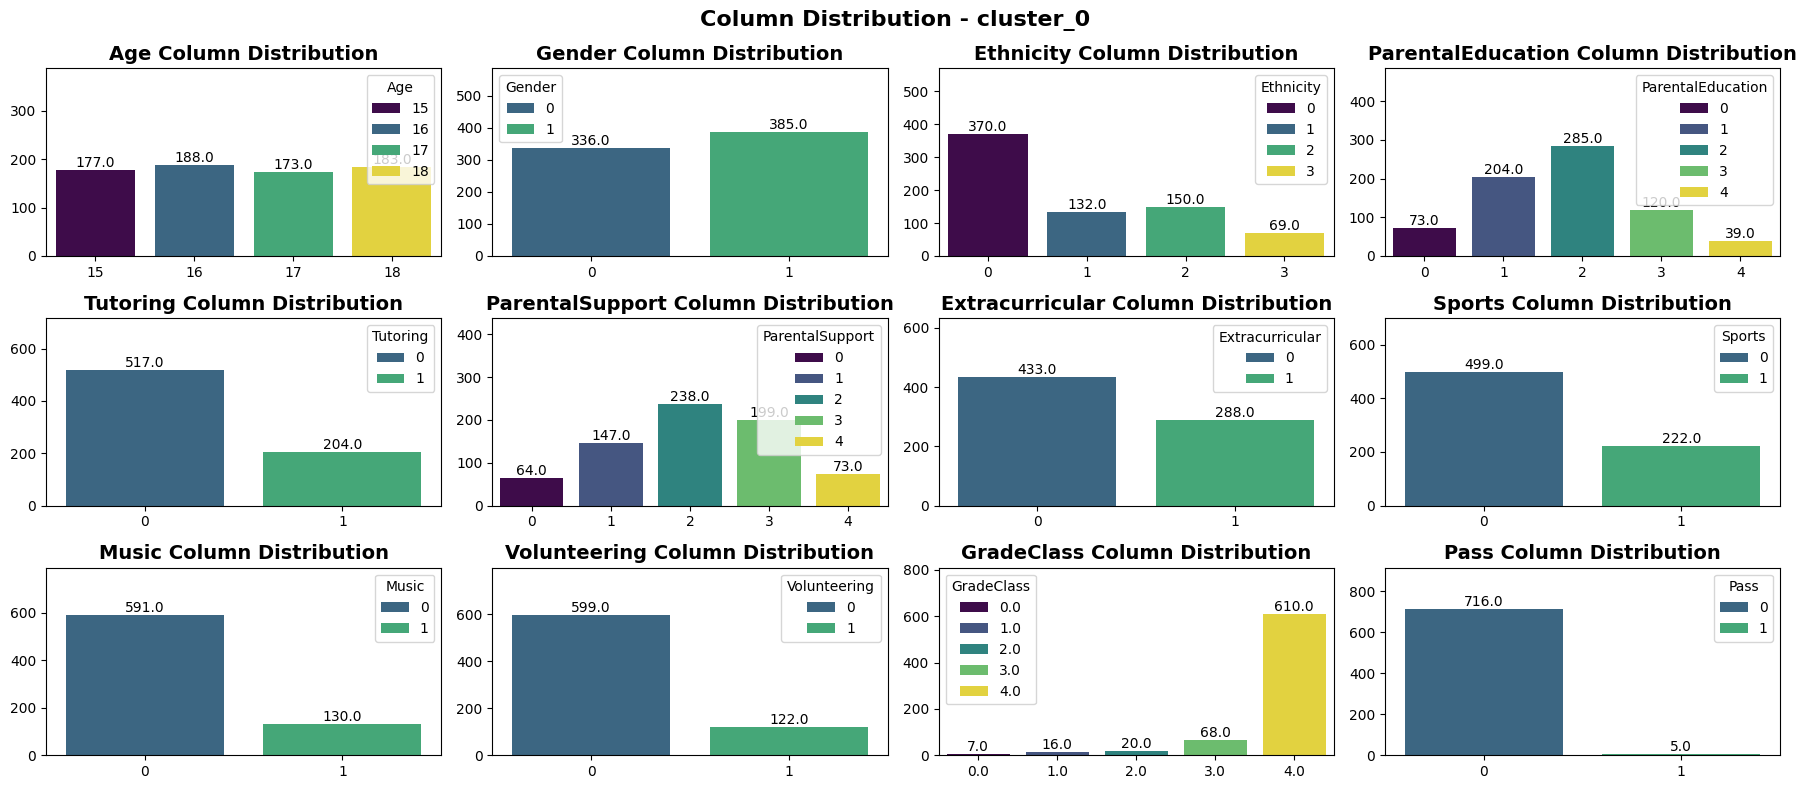

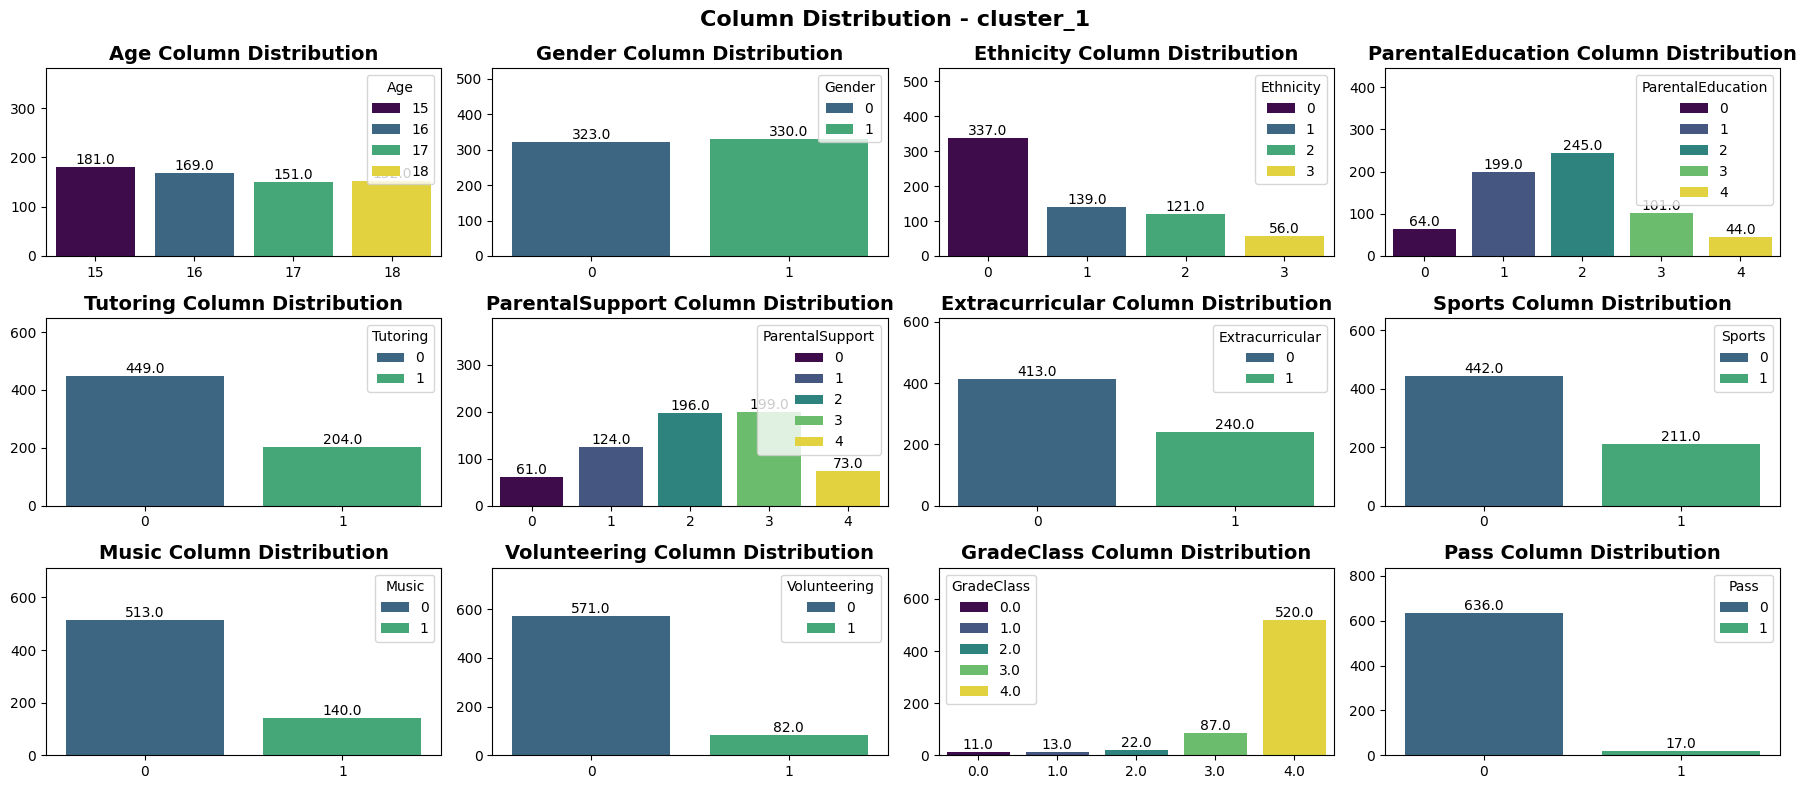

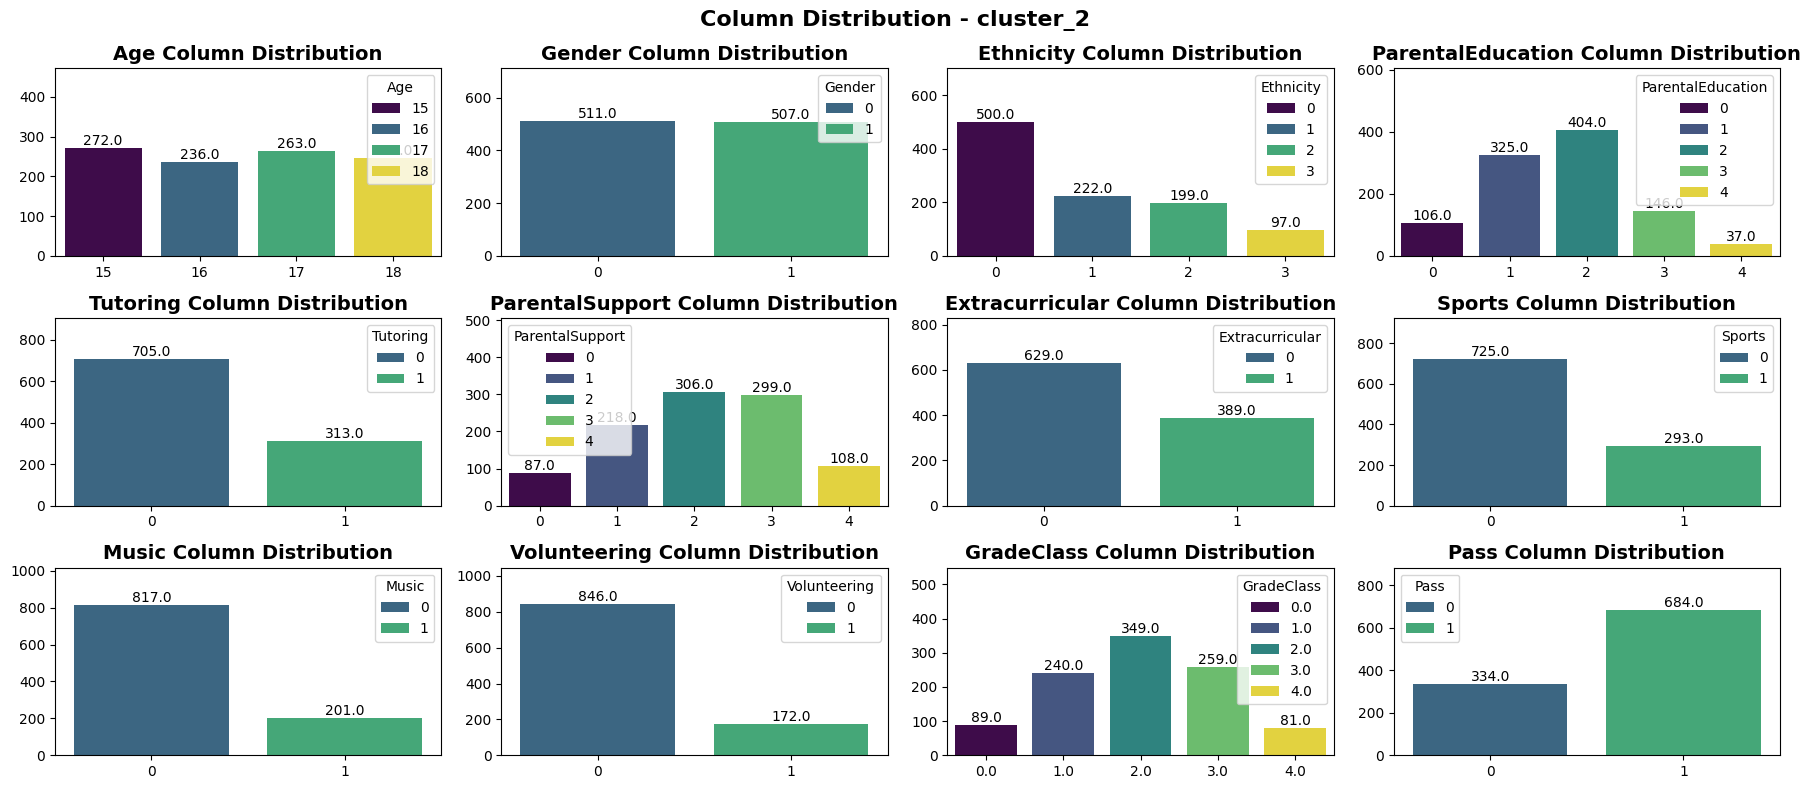

In [ ]:
cols_forbid = ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA', 'cluster']
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]
clusters = {
    'cluster_0': cluster_0,
    'cluster_1': cluster_1,
    'cluster_2': cluster_2
}

for cluster in clusters:
  data = clusters[cluster]
  col = data[[col for col in data.columns if col not in cols_forbid]]

  plt.figure(figsize=(18, 8))
  for i, column in enumerate(col.columns):
    plt.subplot(3, 4, i+1)
    counts = col[column].value_counts()
    ax = sns.barplot(x=counts.index.tolist(), y=counts.values.tolist(), hue=counts.index, palette='viridis')
    for val in ax.containers:
      label=[v.get_height() for v in val]
      ax.bar_label(val, labels=label, label_type='edge')
    plt.title(f'{column} Column Distribution', fontsize=14, fontweight='bold')
    plt.ylim(ymax=counts.max() + 200)
  plt.suptitle(f'Column Distribution - {cluster}', fontsize=16, fontweight='bold')
  plt.tight_layout()
  plt.show()
  print(' ')

#**Conclusion**
---
In general, the dataset is very well-suited for both classification and regression models. Regarding the classification models, both models (SVC and Logistic Regression) are able to classify whether or not a student would pass, with more than 90% accuracy. Regarding the regression model, the Polynomial Regression model is also able to reliably predict a student's GPA, with an R2 Score of more than 90%.

In the case of Regression, the following features were used:
1. **Age**: student's ages, more mature students may have better understanding of subjects or have more experience with a certain subject.
2. **Gender**: student's gender.
3. **StudyTimeWeekly**: a student's weekly study duration, which may suggest that students who study more tend to perform better.
4. **Absences**: number of absences a student has, higher absences may mean that a student does not have enough time to process subjects, leading to lower performance.
5. **Tutoring**: whether or not a student is tutored, where students who are tutored may perform better thanks to the additional understanding gained during said sessions.
6. **ParentalSupport**: the degree of education that a student's parents has, which may suggest that students with parents who has higher education tend to have better learning support at home, and as such, performs better.
7. **Extracurricular**: whether or not a student participates in extracurricular activities.
8. **Sports**: whether or not a student participates in sport activities.
9. **Music**: whether or not a student participates in musical activities.
10. **Volunteering**: whether or not a student volunteered on activities.

In the case of Classification, all features from regression are used, except for the Age feature.

The clustering results, on the other hand, are less conclusive, having a low silhouette score of around 0.30. However, the results of clustering still yields the following insights:
1. **Cluster 0**: This cluster includes students who are ***the most at risk***, having the **lowest GPA and Study Time**, and as such, ***many students in this cluster would not pass***. However, interestingly, students of this cluster only has the second highest absence number, just after Cluster 1.
2. **Cluster 1**: Includes **students with relatively low GPA and high numbers of absences**. As such, ***many students from this cluster would not pass***. However, these students does have the **highest average weekly study time** compared to students from other clusters, so these students' scores ***could still be easily salvaged***.
3. **Cluster 2**: This cluster **has the most students** compared to other clusters. This cluster **includes students with relatively high GPA** (at least passing score), who tends to have **low absences and a relatively high weekly study time**. As such, ***many students in this cluster would pass***.